<a href="https://colab.research.google.com/github/doris-asongafac/Support-Vector-Machines/blob/main/Wine_Quality_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy as sp
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving data-table-B11.csv to data-table-B11.csv


In [ ]:
import pandas as pd
file_name = list(uploaded.keys())[0]  # Get the uploaded file name
wine = pd.read_csv(file_name)



In [ ]:
wine.head()

,Clarity,Aroma,Body,Flavor,Oakiness,Quality,Region
0,1.0,3.3,2.8,3.1,4.1,9.8,1
1,1.0,4.4,4.9,3.5,3.9,12.6,1
2,1.0,3.9,5.3,4.8,4.7,11.9,1
3,1.0,3.9,2.6,3.1,3.6,11.1,1
4,1.0,5.6,5.1,5.5,5.1,13.3,1


In [ ]:
# Check pairwise correlations
wine.corr()

,Clarity,Aroma,Body,Flavor,Oakiness,Quality,Region
Clarity,1.000000,0.061902,-0.308378,-0.085160,0.183215,0.028441,-0.020320
Aroma,0.061902,1.000000,0.548910,0.736561,0.201644,0.707324,0.620101
Body,-0.308378,0.548910,1.000000,0.646659,0.152106,0.548702,0.435440
Flavor,-0.085160,0.736561,0.646659,1.000000,0.179761,0.790047,0.505918
Oakiness,0.183215,0.201644,0.152106,0.179761,1.000000,-0.047040,-0.059569
Quality,0.028441,0.707324,0.548702,0.790047,-0.047040,1.000000,0.507049
Region,-0.020320,0.620101,0.435440,0.505918,-0.059569,0.507049,1.000000


In [ ]:
# Check summary statistics for all numeric variables
print(wine.describe())


         Clarity      Aroma       Body     Flavor   Oakiness    Quality  \
count  38.000000  38.000000  38.000000  38.000000  38.000000  38.000000   
mean    0.923684   4.847368   4.684211   4.768421   4.255263  12.436842   
std     0.123975   1.082474   0.824138   1.028014   0.738039   2.045353   
min     0.500000   3.300000   2.600000   2.900000   2.900000   7.900000   
25%     0.825000   4.125000   4.150000   4.225000   3.700000  11.150000   
50%     1.000000   4.650000   4.750000   4.800000   4.100000  12.450000   
75%     1.000000   5.450000   5.375000   5.500000   4.775000  13.750000   
max     1.000000   7.700000   6.600000   7.000000   6.000000  16.100000   

          Region  
count  38.000000  
mean    1.868421  
std     0.875216  
min     1.000000  
25%     1.000000  
50%     2.000000  
75%     3.000000  
max     3.000000  


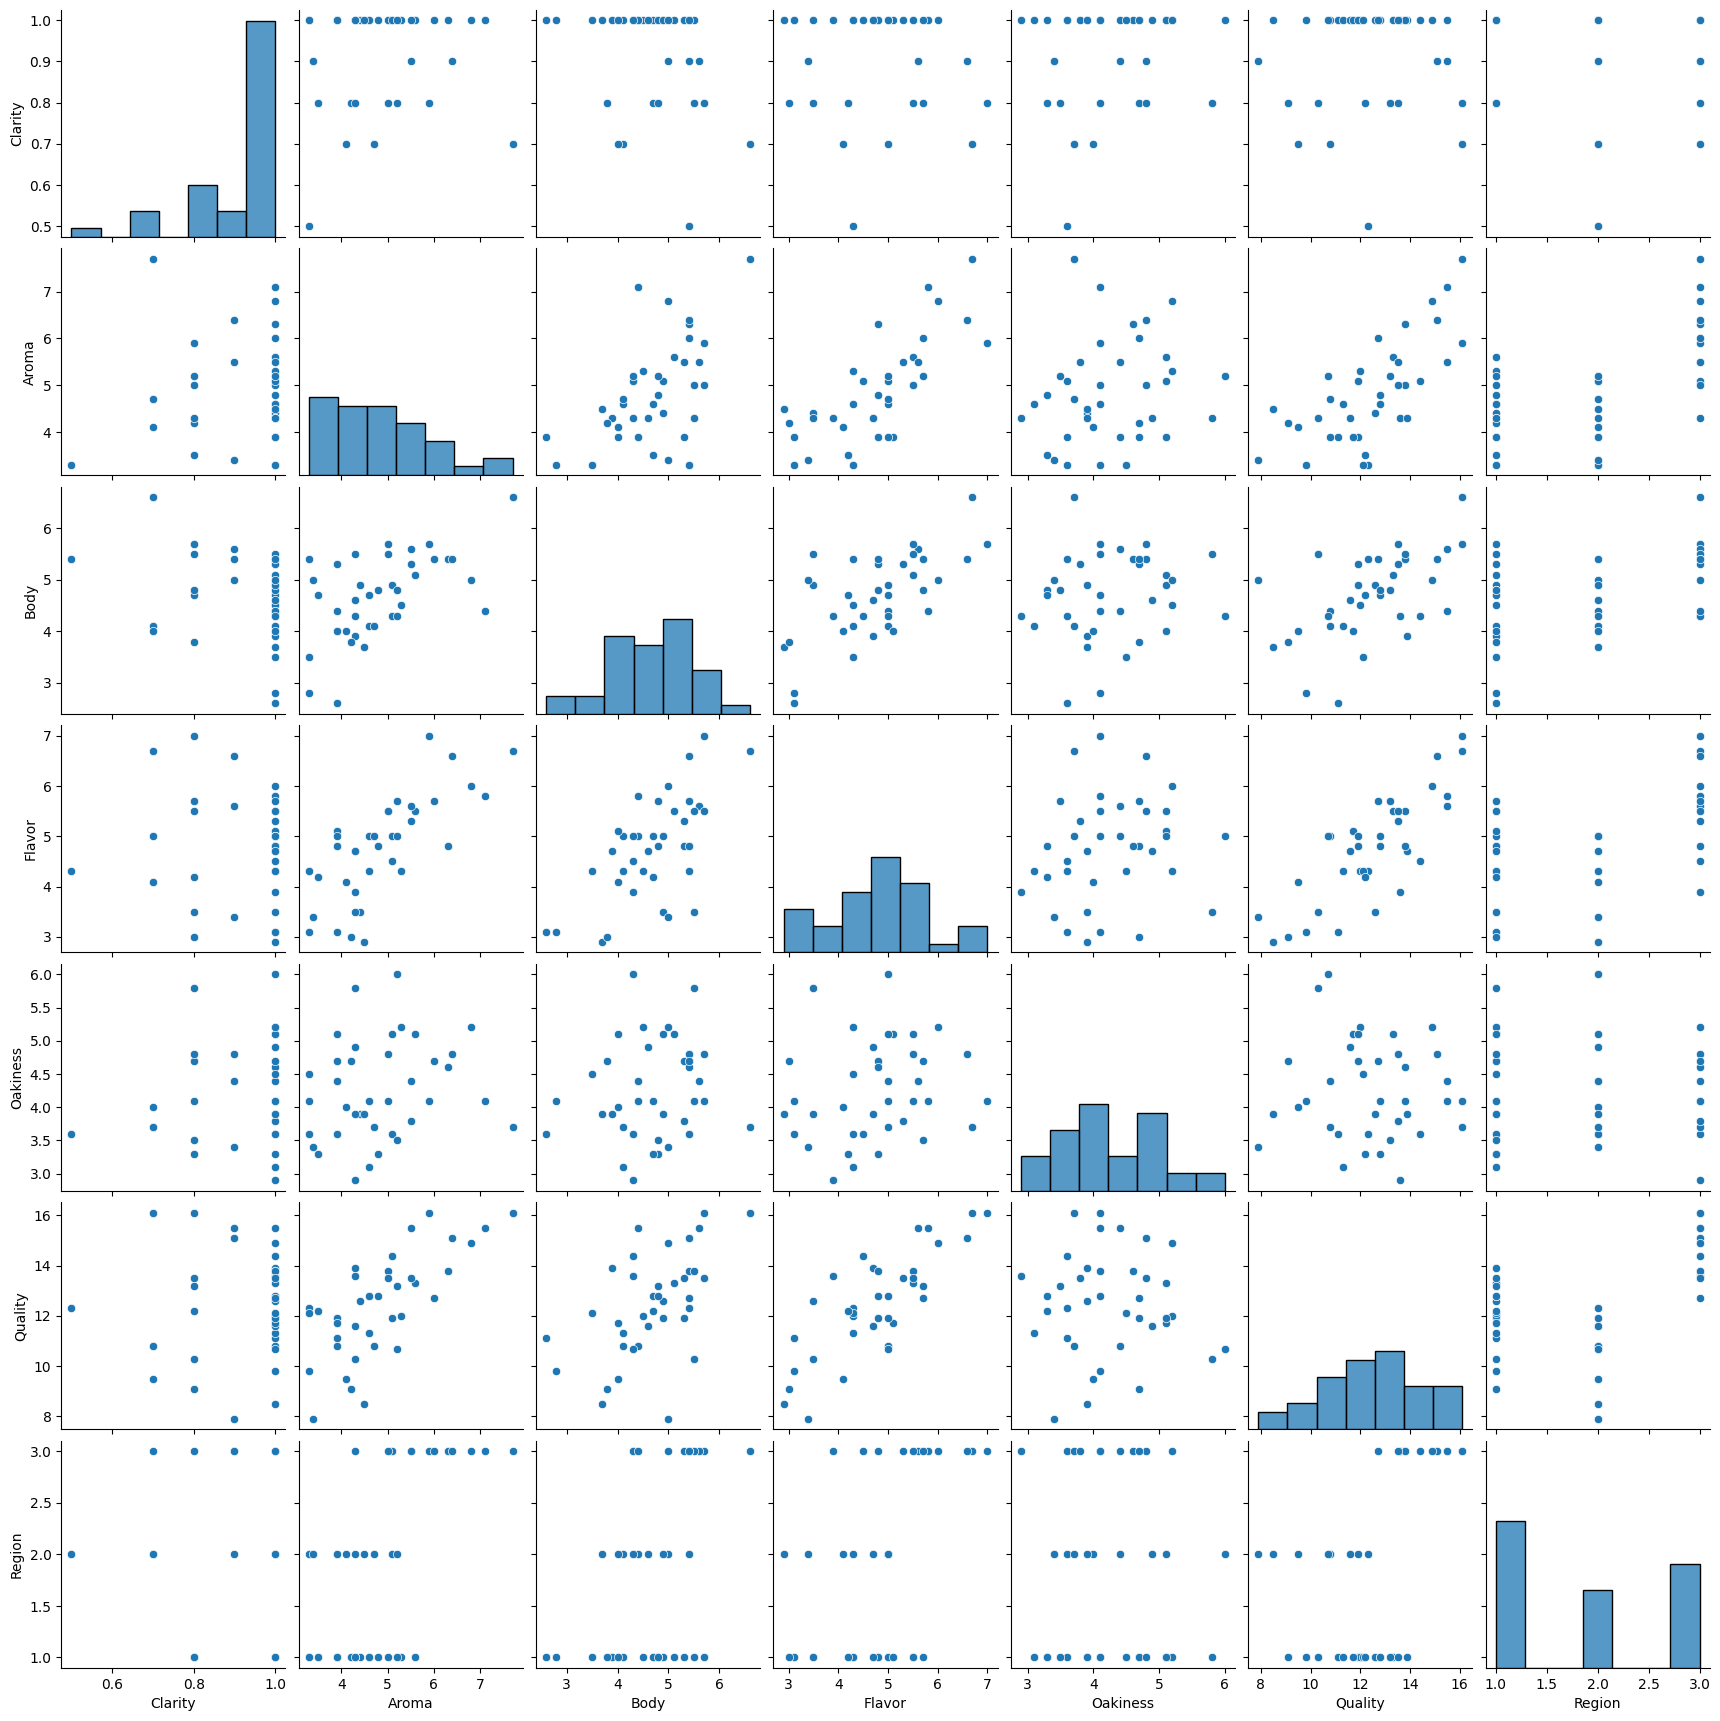

In [ ]:
# Paired scatter plots
sns.pairplot(wine)

In [ ]:
# Running a regression model
lmod = smf.ols(formula = 'Quality ~ Clarity+Aroma+Body+Flavor+Oakiness+Region', data = wine).fit()
lmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Quality   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     13.33
Date:                Thu, 20 Mar 2025   Prob (F-statistic):           2.04e-07
Time:                        22:09:59   Log-Likelihood:                -56.370
No. Observations:                  38   AIC:                             126.7
Df Residuals:                      31   BIC:                             138.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.9843      2.270      1.755      0.089      -0.645       8.613
Clarity        2.3475      1.764      1.331      0.193      -1.249       5.944
Aroma          0.4973      0.305      1.629      0.114      -0.125       1.120
Body           0.2784      0.341      0.817      0.420      -0.417       0.974
Flavor         1.1699      0.310      3.779      0.001       0.538       1.801
Oakiness      -0.6923      0.285     -2.431      0.021      -1.273      -0.111
Region        -0.0338      0.296     -0.114      0.910      -0.637       0.569
==============================================================================
Omnibus:                        1.020   Durbin-Watson:                   0.845
Prob(Omnibus):                  0.601   Jarque-Bera (JB):                0.911
Skew:                          -0.357   Prob(JB):                        0.634
Kurtosis:                       2.745   Cond. No.                         137.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Better printing
lmod = smf.ols(formula = 'Quality ~ Clarity+Aroma+Body+Flavor+Oakiness+Region', data = wine).fit()
lmod.summary()
print(lmod.summary())

                            OLS Regression Results                            
Dep. Variable:                Quality   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     13.33
Date:                Thu, 20 Mar 2025   Prob (F-statistic):           2.04e-07
Time:                        22:10:56   Log-Likelihood:                -56.370
No. Observations:                  38   AIC:                             126.7
Df Residuals:                      31   BIC:                             138.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.9843      2.270      1.755      0.0

In [ ]:
# Print parameters alone
lmod.params

,0
Intercept,3.984327
Clarity,2.347512
Aroma,0.497307
Body,0.278410
Flavor,1.169873
Oakiness,-0.692290
Region,-0.033812


In [ ]:
# More printing
print("Parameters: ", lmod.params)
print("Standard errors: ", lmod.bse)
print("Mean squared errors = ", lmod.mse_resid, "; Regression standard error = ", np.sqrt(lmod.mse_resid))
print("Predicted values: ", lmod.predict())

Parameters:  Intercept    3.984327
Clarity      2.347512
Aroma        0.497307
Body         0.278410
Flavor       1.169873
Oakiness    -0.692290
Region      -0.033812
dtype: float64
Standard errors:  Intercept    2.269652
Clarity      1.763623
Aroma        0.305355
Body         0.340915
Flavor       0.309584
Oakiness     0.284831
Region       0.295679
dtype: float64
Mean squared errors =  1.3945087058395962 ; Regression standard error =  1.1808931813841572
Predicted values:  [ 9.50690396 11.24501016 12.0747227  10.09575149 13.40645779 12.90514051
 13.35230072 11.61714337 12.12084831 12.32071658 12.73601448 10.77319406
 15.63266837 16.46959363 14.93315932 13.79514686 13.2977057  13.84410326
 12.61147398 10.73613832 15.07999791 14.01078747 12.32667546 10.73987761
 14.13216987 11.789501   11.78683532 12.48337356 12.23200305 10.22491301
 11.74299696  9.23102664 10.82872202 14.4234683  13.01330411 11.50653423
  9.57747137 13.99614852]


In [ ]:
# Print ANOVA table
print(sm.stats.anova_lm(lmod))

            df     sum_sq    mean_sq          F        PR(>F)
Clarity    1.0   0.125210   0.125210   0.089788  7.664473e-01
Aroma      1.0  77.353210  77.353210  55.469866  2.171597e-08
Body       1.0   6.414421   6.414421   4.599771  3.992427e-02
Flavor     1.0  19.049819  19.049819  13.660596  8.436207e-04
Oakiness   1.0   8.597755   8.597755   6.165436  1.864437e-02
Region     1.0   0.018236   0.018236   0.013077  9.096941e-01
Residual  31.0  43.229770   1.394509        NaN           NaN


Text(0, 0.5, 'Observed data')

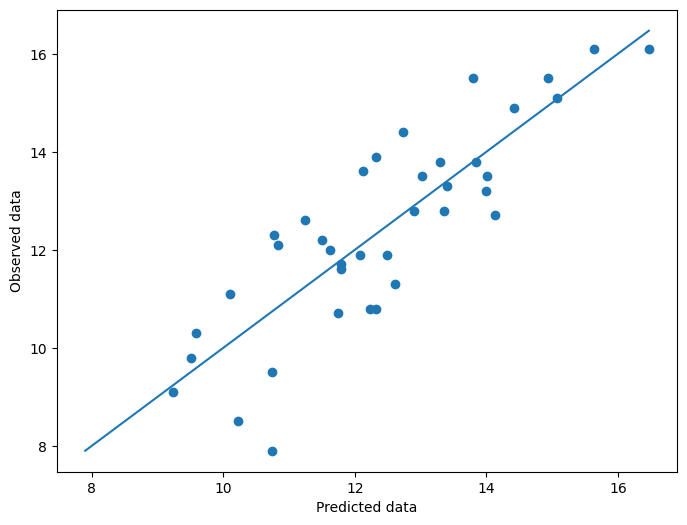

In [ ]:
# Plot the prediction versus observed values
f, ax = plt.subplots(figsize=(8,6))
plt.scatter(lmod.predict(),wine['Quality'])
ident = (min(lmod.predict().min(),wine['Quality'].min()),max(lmod.predict().max(),wine['Quality'].max()))
ax.plot(ident,ident)
#ax.plot([0, 1], [0, 1], transform=ax.transAxes)
ax.set_xlabel('Predicted data')
ax.set_ylabel('Observed data')

In [ ]:
# Calculate VIF
from patsy import dmatrix
X = dmatrix('Clarity+Aroma+Body+Flavor+Oakiness+Region', \
                               wine, return_type = 'dataframe')
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
pd.Series(VIF,X.columns)

,0
Intercept,140.372162
Clarity,1.268415
Aroma,2.898856
Body,2.094459
Flavor,2.687421
Oakiness,1.172503
Region,1.776852


In [ ]:
# Test for single parameter beta_j
# Test H0: beta_Clarity = 0.5
tstat = (lmod.params['Clarity'] - 0.5)/lmod.bse['Clarity']
tstat_pvalue = 2*(1 - sp.stats.t.cdf(abs(tstat),24))
print('t-stat = ', tstat, '; p-value of the t test = ', tstat_pvalue)

t-stat =  1.0475664002683023 ; p-value of the t test =  0.30527425930134844


In [ ]:
# Test for single parameter beta_j
# Test H0: beta_Aroma = 0.5
tstat = (lmod.params['Aroma'] - 0.5)/lmod.bse['Aroma']
tstat_pvalue = 2*(1 - sp.stats.t.cdf(abs(tstat),24))
print('t-stat = ', tstat, '; p-value of the t test = ', tstat_pvalue)

t-stat =  -0.008818309112321818 ; p-value of the t test =  0.9930369915523365


In [ ]:
# Test for single parameter beta_j
# Test H0: beta_Body = 0.5
tstat = (lmod.params['Body'] - 0.5)/lmod.bse['Body']
tstat_pvalue = 2*(1 - sp.stats.t.cdf(abs(tstat),24))
print('t-stat = ', tstat, '; p-value of the t test = ', tstat_pvalue)

t-stat =  -0.6499865236021092 ; p-value of the t test =  0.5218744854474178


In [ ]:
# Test for single parameter beta_j
# Test H0: beta_Flavor = 0.5
tstat = (lmod.params['Flavor'] - 0.5)/lmod.bse['Flavor']
tstat_pvalue = 2*(1 - sp.stats.t.cdf(abs(tstat),24))
print('t-stat = ', tstat, '; p-value of the t test = ', tstat_pvalue)

t-stat =  2.163783603629871 ; p-value of the t test =  0.04065568060151481


In [ ]:
# Test for single parameter beta_j
# Test H0: beta_Oakiness = 0.5
tstat = (lmod.params['Oakiness'] - 0.5)/lmod.bse['Oakiness']
tstat_pvalue = 2*(1 - sp.stats.t.cdf(abs(tstat),24))
print('t-stat = ', tstat, '; p-value of the t test = ', tstat_pvalue)

t-stat =  -4.1859535932869205 ; p-value of the t test =  0.0003290251495395857


In [ ]:
# Test for single parameter beta_j
# Test H0: beta_Region = 0.5
tstat = (lmod.params['Region'] - 0.5)/lmod.bse['Region']
tstat_pvalue = 2*(1 - sp.stats.t.cdf(abs(tstat),24))
print('t-stat = ', tstat, '; p-value of the t test = ', tstat_pvalue)

t-stat =  -1.8053790769778912 ; p-value of the t test =  0.08357639591392041


In [ ]:
# Since 'Clarity', 'Aroma', 'Body', and 'Region' all have high p-values, we would like to know whether they can be removed
# Partial F-test
lmod_red = smf.ols(formula = 'Quality ~ Oakiness+Flavor', data = wine).fit()
print(sm.stats.anova_lm(lmod_red))

            df      sum_sq     mean_sq          F        PR(>F)
Oakiness   1.0    0.342517    0.342517   0.228536  6.355839e-01
Flavor     1.0  101.989911  101.989911  68.050315  1.008998e-09
Residual  35.0   52.455993    1.498743        NaN           NaN


In [ ]:
sm.stats.anova_lm(lmod_red,lmod)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,35.0,52.455993,0.0,NaN,NaN,NaN
1,31.0,43.229770,4.0,9.226223,1.654028,0.185814


In [ ]:
# Confidence intervals for beta's
lmod.conf_int()

,0,1
Intercept,-0.644659,8.613313
Clarity,-1.249421,5.944445
Aroma,-0.125469,1.120084
Body,-0.416890,0.973710
Flavor,0.538472,1.801273
Oakiness,-1.273207,-0.111373
Region,-0.636853,0.569229


In [ ]:
# To get CI for the mean response and PI for a future prediction at a specific x0
x0 = pd.DataFrame(
    {'Intercept': [1], 'Clarity': [1.0], 'Aroma': [6.5], 'Body': [4.5], 'Flavor': [5.5], 'Oakiness': [5.0], 'Region': [1]}
)
prediction = lmod.get_prediction(x0).summary_frame()
print(prediction)


        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  13.756217  0.623448      12.484687      15.027748     11.032725   

   obs_ci_upper  
0     16.479709  
